In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result


In [3]:
# Generate a dataset with 3 features each with N entries (N being O(1000))
N = 1000
x = np.zeros((3,N))
x[0] = npr.normal(0,1,size = N)
x[1] = x[0] + npr.normal(0,3, size = N) 
x[2] = 2*x[0] + x[1]

# Find the eigenvalues and eigenvectors of the covariance matrix of the dataset
cov = np.cov(x) # Compute the covariance matrix: for 2D entry, rows are variables, columns are instances
#cov = np.dot(x, x.T)/(N-1) # This is just the explicit way of computing the covariance
l, V = la.eig(cov) # Find the eigenvalues and eigenvectors: eigenvalues (may be complex) and repeat according to their molteplicity and are not ordered

# Find the eigenvectors and eigenvalues using SVD. 
U, spectrum, Vt = la.svd(cov) # Singular values are sorted in descending order

# Check that the two procedures yield to same result. 
# NOTICE: eigenvectors are columns of what are called U and V. (In SVD btw V = U because cov is symmetric). 
# Thus to visualize eigenvectors as rows I print the transposed.
print("Eigenvalues of cov:\n", np.real_if_close(l), '\n')
print("Eigenvectors of cov:\n", np.real_if_close(V.T), '\n') #If input is complex with all imaginary parts close to zero, return real parts.

print("SVD eigenvalues:\n", spectrum, '\n')
print("SVD eigenvectors:\n", U.T, '\n')

Eigenvalues of cov:
 [ 2.46655076e+01 -1.72014026e-16  2.05057608e+00] 

Eigenvectors of cov:
 [[-0.11126748 -0.58258359 -0.80511856]
 [-0.81649658 -0.40824829  0.40824829]
 [ 0.56652703 -0.70280131  0.43025275]] 

SVD eigenvalues:
 [2.46655076e+01 2.05057608e+00 2.51380310e-16] 

SVD eigenvectors:
 [[-0.11126748 -0.58258359 -0.80511856]
 [ 0.56652703 -0.70280131  0.43025275]
 [-0.81649658 -0.40824829  0.40824829]] 



* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.


In [4]:
Lambda=np.diag(spectrum) 
perc = (spectrum/Lambda.trace())*100
print("percent of total dataset's variability of each principal component:", np.real_if_close(perc), '\n')

new_perc = ((spectrum[0] + spectrum[1])/Lambda.trace())*100
print("Retained variability percentage keeping the first two principal components:", new_perc)

percent of total dataset's variability of each principal component: [9.23245633e+01 7.67543668e+00 9.40932484e-16] 

Retained variability percentage keeping the first two principal components: 100.0


**COMMENT:**
> As a first thing, in the above code I used the results obtained by SVD because ordered. This allows an additional check. \

> What found makes sense due given how the dataset was constructed. Indeed the dataset has a dominant linear structure! Most variability is due to x1. Then x2 is basically determined by x1 adding only a little variability, while x3 adds no information since it's completely determined by x1 and x2. If there was no noise at all, all the data would lay on a plane in 3D given by x3 = 2x1 + x2. In particular, it would lay on a line in this plane defined by x1 = x2. However, the points move out of this plane due to the random noise added in the two equations. Getting rid of the lest significant principal component, we're basically looking at how the points move out of the plane along the two other components (notice that all principal components are orthogonal to one another).

* Redefine the data in the basis yielded by the PCA procedure

In [5]:
# NOTICE: in general to rotate a vector to match the eigenbasis I have to apply to it V.T (the transpose or inverse of the matrix that has the eigenvectors as columns).

xP = np.dot(V.T,x) # xP is the data projected to the new basis


* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.

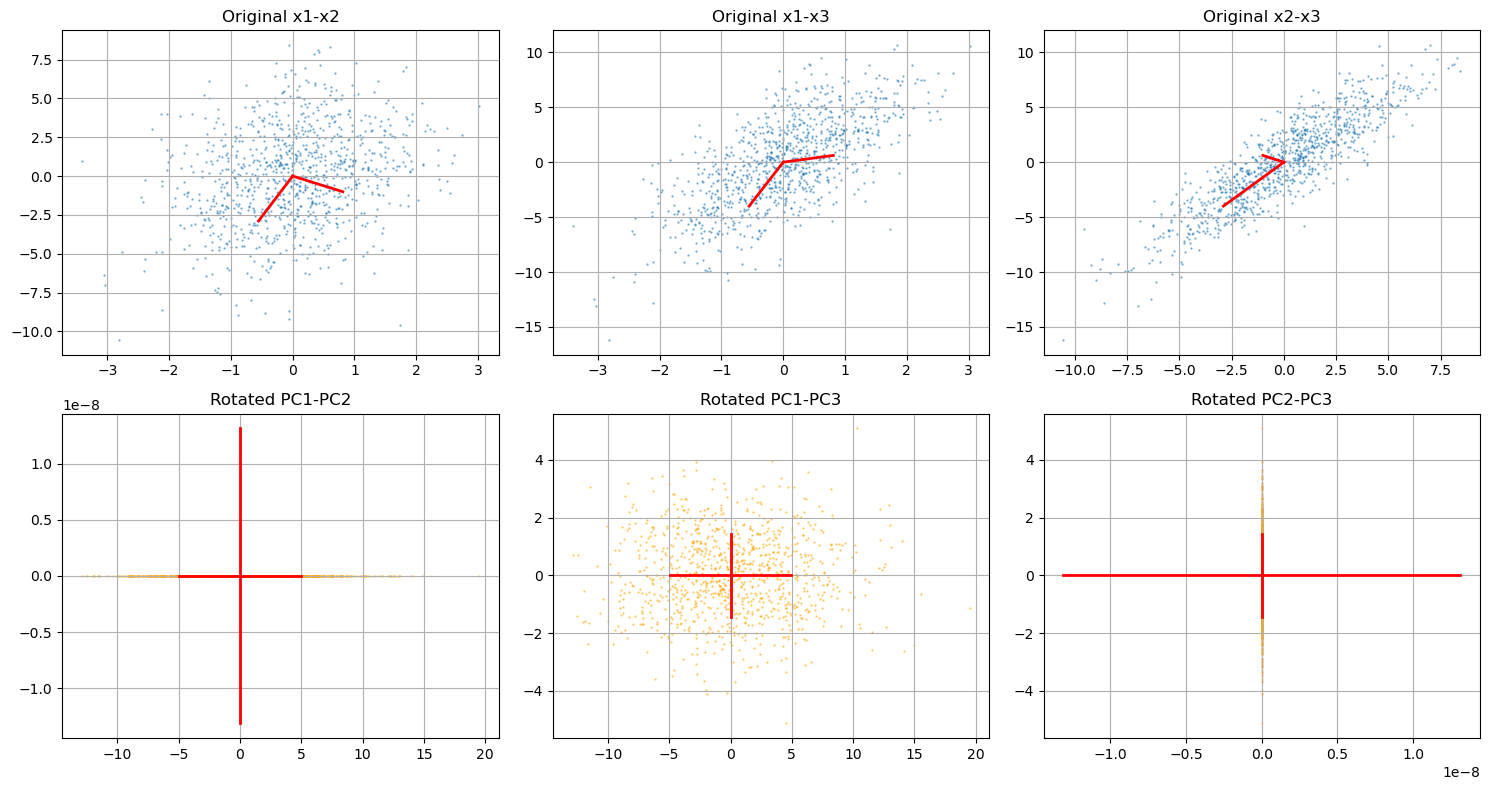

In [6]:
# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
projections = [(0, 1), (0, 2), (1, 2)]
titles_orig = ['Original x1-x2', 'Original x1-x3', 'Original x2-x3']
titles_rot = ['Rotated PC1-PC2', 'Rotated PC1-PC3', 'Rotated PC2-PC3']

# Plot original data with eigenvectors
for idx, (p, title) in enumerate(zip(projections, titles_orig)):
    axs[0, idx].scatter(x[p[0]], x[p[1]], s=0.5, alpha=0.5)
    for li, vi in zip(l, V.T):
        # Scale eigenvectors by sqrt of eigenvalue
        scale = np.sqrt(np.abs(np.real(li)))
        axs[0, idx].plot([0, scale * vi[p[0]]], 
                        [0, scale * vi[p[1]]], 
                        'r-', lw=2)
    axs[0, idx].set_title(title)
    axs[0, idx].grid(True)

# Plot rotated data with principal directions
for idx, (p, title) in enumerate(zip(projections, titles_rot)):
    axs[1, idx].scatter(xP[p[0]], xP[p[1]], s=0.5, color='orange', alpha=0.5)
    
    # Plot principal directions
    std_dev1 = np.sqrt(np.abs(np.real(l[p[0]])))  # standard deviation along first PC
    std_dev2 = np.sqrt(np.abs(np.real(l[p[1]])))  # standard deviation along second PC
    
    # Plot vectors in direction of principal components, scaled by their standard deviations
    # NOTICE: I could've computed VP = V.T*V but it is the identity, so to avoid numerical issues I just go like this
    axs[1, idx].plot([-std_dev1, std_dev1], [0, 0], 'r-', lw=2)  # First PC
    axs[1, idx].plot([0, 0], [-std_dev2, std_dev2], 'r-', lw=2)  # Second PC
    
    axs[1, idx].set_title(title)
    axs[1, idx].grid(True)

plt.tight_layout()
plt.show()


In [7]:
# NOTICE: I could've computed VP = V.T*V but it is the identity, so we just go for it to avoid numerical issues
VP = np.dot(V.T, V)
print("\nVP.T (what you suggested):")
print(np.real_if_close(VP.T))
print("\nCompare with identity matrix:")
print(np.eye(3))


VP.T (what you suggested):
[[ 1.00000000e+00  3.33513863e-16 -3.03756245e-16]
 [ 3.33513863e-16  1.00000000e+00 -6.45820935e-16]
 [-3.03756245e-16 -6.45820935e-16  1.00000000e+00]]

Compare with identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Dataset shape: (3, 5000) 

Eigenvalues of covariance matrix of the dataset: [ 2.75200753e+01 -3.76994347e-16  2.00315788e+00] 

Eigenvectors of covariance matrix of the dataset:
 [[-0.11488767 -0.57807786 -0.80785321]
 [-0.81649658 -0.40824829  0.40824829]
 [ 0.56580399 -0.70651208  0.4250959 ]] 

Eigenvalues using svd: [2.75200753e+01 2.00315788e+00 7.04272306e-16] 

Eigenvectors using svd: 
 [[-0.11488767 -0.57807786 -0.80785321]
 [ 0.56580399 -0.70651208  0.4250959 ]
 [-0.81649658 -0.40824829  0.40824829]] 

Variability retained by each principal component: [9.32149779e+01 6.78502205e+00 2.38548502e-15] 

Number of components to retain in order to preserve 99% variability: 2 



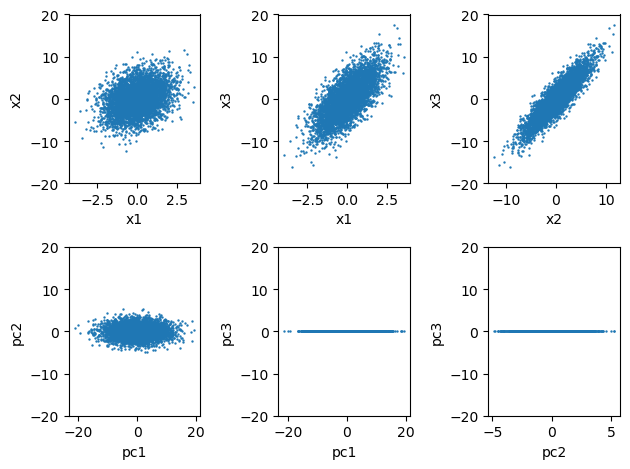

In [8]:
# Another - simpler - way of doing it

#  Generate a dataset with 3 features each with N entries 
N = 5000
x1 = npr.normal(0,1, N)
x2 = x1 + npr.normal(0,3, N)
x3 = 2*x1 + x2
data = [x1,x2,x3]
print("Dataset shape:", np.shape(data), '\n')

# Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
cov = np.cov(data)
l, V = la.eig(cov)
print("Eigenvalues of covariance matrix of the dataset:", np.real_if_close(l), '\n')
print("Eigenvectors of covariance matrix of the dataset:\n", V.T, '\n')

# Find the eigenvectors and eigenvalues using SVD --> it is the same but eigenvalues and eigenvectors are sorted id descending eigenvalue order
U, spectrum, Vt = la.svd(cov)
print("Eigenvalues using svd:", spectrum, '\n')
print("Eigenvectors using svd: \n", U.T, '\n')

# What percent of the total dataset's variability is explained by the principal components?
Lambda = np.diag(spectrum)
perc = (spectrum/np.trace(Lambda))*100
print("Variability retained by each principal component:", perc, '\n')

# Number of components to retain in order to preserve 99% variability of the system
cum_perc = np.cumsum(perc)
N_min = np.argmax(cum_perc >= 99) + 1
print("Number of components to retain in order to preserve 99% variability:", N_min, '\n')

# Redefine the data in the basis yielded by the PCA procedure
rot_data = np.dot(U.T, data)

# Plot the data points in the original and the new coordiantes as a set of scatter plots. 
# Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.
idx = range(1,7)
proj = [(0,1), (0,2), (1,2)]
for i,j in zip(idx, proj*2): 
    plt.subplot(2,3, i)
    if i <= 3: 
        plt.scatter(data[int(j[0])],data[int(j[1])], s = 0.5)
        plt.xlabel(f"x{j[0]+1}")
        plt.ylabel(f"x{j[1]+1}")
        plt.ylim(-20,20)
    elif i > 3: 
        plt.scatter(rot_data[int(j[0])],rot_data[int(j[1])], s = 0.5)
        plt.xlabel(f"pc{j[0]+1}")
        plt.ylabel(f"pc{j[1]+1}")
        plt.ylim(-20,20)
plt.tight_layout()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before. 

new dataset shape: (13, 1000) 

Retained variabiility percentage per principal component: [9.32132618e+01 6.77383200e+00 1.57806927e-03 1.50167732e-03
 1.38087927e-03 1.32531548e-03 1.30184278e-03 1.28561735e-03
 1.21523767e-03 1.15916812e-03 1.13368539e-03 1.02469169e-03
 6.20609380e-15]
Number of components to retain 99% variability: 2



Text(0.5, 1.0, 'Scatter plot of data after PCA')

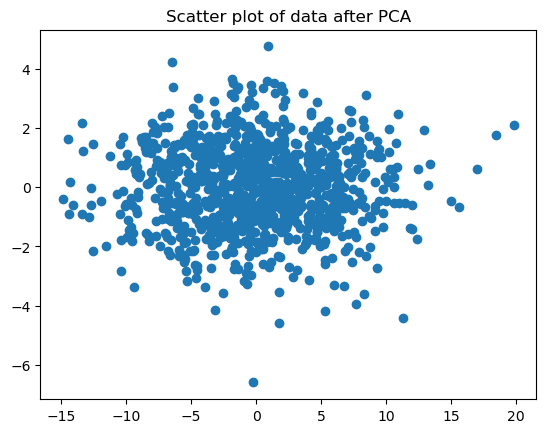

In [122]:
# I create the new dataset
x_additional = npr.normal(0,1/50, (10,N))
x_new = np.row_stack((x_additional,x))
print("new dataset shape:", np.shape(x_new), '\n')

# I compute the covariance matrix and find its eigenvalues/eigenvectors
new_cov = np.cov(x_new)
new_U, new_spectrum, new_Vt = la.svd(new_cov)

# I check at the variability retained by each principal component
new_Lambda = np.diag(new_spectrum)
new_perc = (new_spectrum/new_Lambda.trace())*100

print("Retained variabiility percentage per principal component:", new_perc)

# I find the principal components that retain 99 percent of variance
cumulative_variance = np.cumsum(new_perc) #returns the index of the first occurrence of True
num_components = np.argmax(cumulative_variance >= 99) + 1
print(f"Number of components to retain 99% variability: {num_components}\n")

# Rotate again the data
new_xP = np.dot(new_U.T, x_new)

# Plot the transformed data
plt.scatter(new_xP[0], new_xP[1])
plt.title("Scatter plot of data after PCA")

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


**NOTICE**: 
At some point in the following code, I stack together all coordinates. This allows to have a dataset ready for PCA. Thanks to this, starting from 1000 data points that have many features, you Identify which combinations of features contribute the most to the variance across all data points (without needing to "understand" that columns correspond to different cameras or coordinates). You basically look for redundancies and correlations. 

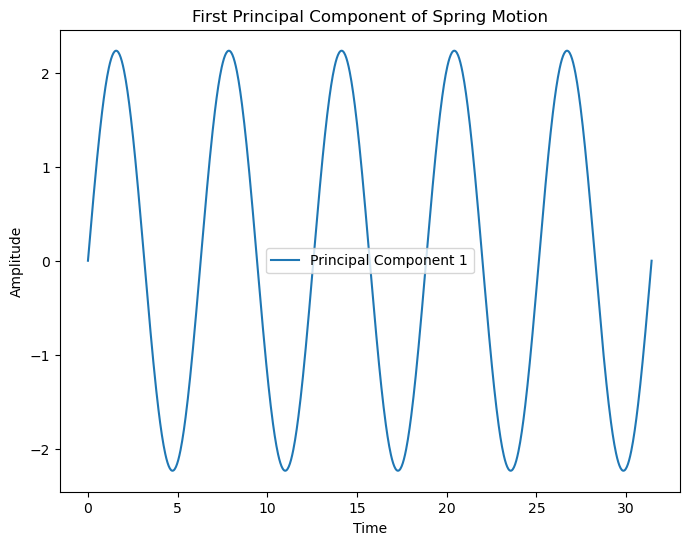

In [11]:
# Number of cameras and their orientations
n = 5  # Number of cameras
cam_theta = npr.uniform(0, np.pi, n)  # Theta angles of cameras
cam_phi = npr.uniform(0, 2 * np.pi, n)  # Phi angles of cameras

# Simulation of motion along the x-axis
t = np.linspace(0, 10 * np.pi, 1000)  # Time array with sufficient resolution
x = np.sin(t)  # Oscillation along x-axis
y = npr.normal(0, 0.05, len(t))  # Add noise along y-axis
z = np.zeros_like(x)  # No motion along z-axis

# Combine into a single dataset
spring_data = np.vstack((x, y, z)).T  # Shape: (1000, 3)

# Transform data for each camera
camera_records = []
for theta, phi in zip(cam_theta, cam_phi):
    # Rotation matrix for the camera's orientation
    R = np.array([
        [np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)],
        [np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)],
        [-np.sin(phi), np.cos(phi), 0]
    ])
    # Rotate the spring data
    rotated_data = spring_data @ R.T # This is equivalent to np.dot(spring_data, R.T)
    camera_records.append(rotated_data) # Shape: (n, 1000, 3)

#print(np.shape(camera_records))

# Stack all camera recordings into a single dataset
camera_records = np.hstack(camera_records)  # Shape: (1000, 3*n) --> concatenation along the second axis

# Perform Principal Component Analysis (PCA)

cov = np.cov(camera_records.T)
U, spectrum, _ = la.svd(cov)
Lambda = np.diag(spectrum)
perc = (spectrum/Lambda.trace())*100

PCA_data = np.dot(U.T, camera_records.T)

# Visualization of the first principal component
plt.figure(figsize=(8, 6))
plt.plot(t, PCA_data[0], label="Principal Component 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("First Principal Component of Spring Motion")
plt.legend()
plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [160]:
# get the dataset and its description on the proper data directory
#!curl -L -O https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!curl -L O https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1442k    0 1442k    0     0   878k      0 --:--:--  0:00:01 --:--:--  878k      0      0 --:--:-- --:--:-- --:--:--     0
1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from

[3.56482892e+01 2.23879248e+01 2.00692284e+01 1.49206284e+01
 4.10661911e+00 1.51773052e+00 1.34156380e+00 7.92750617e-03
 8.82355926e-05 1.95631964e-15]
Number of components to retain 55% variability: 2



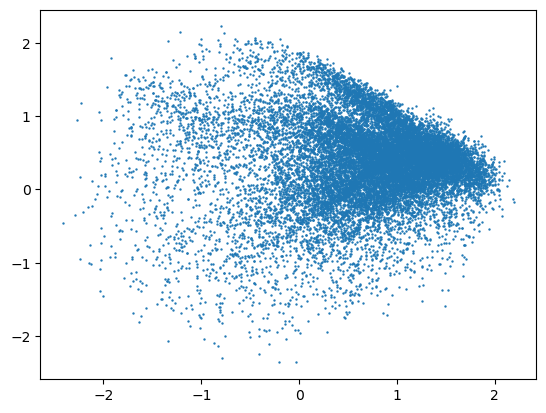

In [23]:
data = pd.read_csv('magic04.data', header = None)
data = data.drop(10, axis = 1)
data = data.T

# Standardize the data to ensure that all features contribute equally to the analysis
mean = data.mean(axis=0)
std = data.std(axis=0)
scaled_data = (data - mean) / std

# Do PCA
cov = np.cov(scaled_data)
U, spectrum, _ = la.svd(cov)
Lambda = np.diag(spectrum)
perc = (spectrum/Lambda.trace())*100

PCA_data = np.dot(U.T, scaled_data)

print(perc)

# Find the components that retain the most variance
cumulative_variance = np.cumsum(perc) #returns the index of the first occurrence of True
num_components = np.argmax(cumulative_variance >= 55) + 1
print(f"Number of components to retain 55% variability: {num_components}\n")

plt.scatter(PCA_data[0], PCA_data[1], s = 0.5)

**NOTICE:**
This last exercise was done without thinking much about the physics of the problem. 
Should be revised.